### <strong>第一次淺度機器學習作業：主成分分析的原理與實驗</strong>
學號：411078025

姓名：張子恩 
<hr>

 <font color=steelblue>**作業目標**</font>
  <br>
  
本次作業透過主成分分析探索酒商與其紅酒化學成分之間的關係（習題一），以及乳癌患者的腫瘤資料（習題二）。我們將使用 Python 繪製盒鬚圖和散佈圖，並透過主成分分析來降低數據維度，以及討論在二維和三維空間中哪個更適合表示數據，以及哪些變數對數據的解釋最為重要
<hr>


#### ***習題一***
有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：


1.繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot）


     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

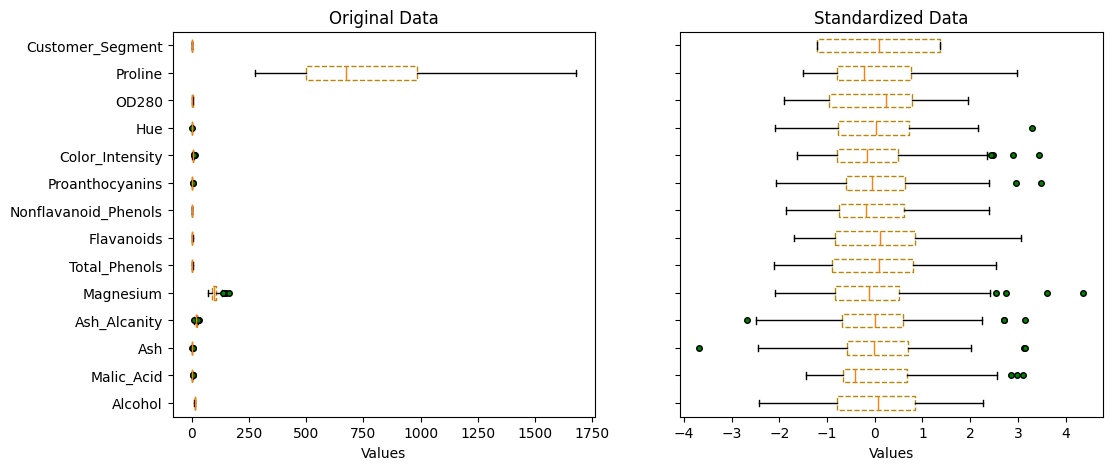

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn
from numpy.linalg import eig
from matplotlib.ticker import PercentFormatter

df = pd.read_excel("/Users/peterppp/Downloads/wine.xlsx")
# Z1 = df['Alcohol']
# Z2 = df['Malic_Acid']
# plt.scatter(Z2,Z1)

ratings = np.array(df)


scaler = StandardScaler()
scaler.fit(ratings)
ratings_ = scaler.transform(ratings)
categories = df.columns



fig, ax = plt.subplots(1, 2, figsize=(12, 5))
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green',
                  markersize=4, linestyle='none')
ax[0].boxplot(ratings, boxprops=boxprops, flierprops=flierprops,
              labels=categories, vert=False)
ax[0].set_xlabel('Values')
ax[0].set_title('Original Data')

ax[1].boxplot(ratings_, boxprops=boxprops, flierprops=flierprops, vert=False)
ax[1].set_xlabel('Values')
ax[1].tick_params(labelleft=False)
ax[1].set_title('Standardized Data')
plt.show()

#### **討論**
左圖為未經過標準化的化學成分盒鬚圖，除了proline(脯胺酸)能看到完整散佈和級距情況，其餘成分全部都濃縮成一團，這是因為每個成分單位皆不相同，只要其中一變數單位值是遠大於其他單位，其於變數畫出來的盒鬚圖就會遭到壓縮。單位不同則無從比較，右圖為標準化後的情況，其餘變異量、中位數、四分位並沒有誇張地與其他成分差太多，除了costumer_segment(紅酒製造商)，因為是類別資料非連續型資料，所以使用盒鬚圖沒有意義。

2.繪製變數間的相關係數圖，以觀察變數間是否存在相關性



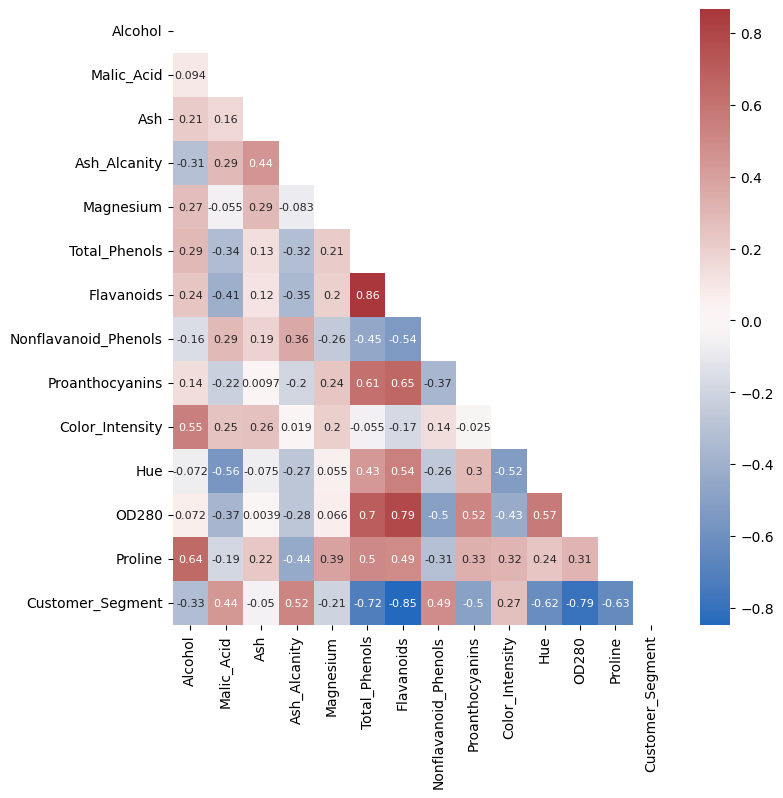

In [18]:

data = pd.DataFrame(ratings_, columns=categories)
R = data.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
fig, ax = plt.subplots(figsize=(8, 8))
seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', annot_kws={"size": 8})
plt.show()

#### **討論**
為了暸解各個成分間的相關性大小，畫出熱力圖，相關係數矩陣為對稱矩陣，因此僅呈現下半部。，其越紅代表相關程度越為正相關，越藍相關程度越為負相關，越接近白色其程度越接近無關係，圖中可以發現Flavonoids(類黃酮)和Total_phenols（總酚）跟 OD280（蛋白質吸光度）正相關程度很高，分別為0.86和0.79，而三間酒商（1~3）和Total_Phenols、Flavanoids、OD280為高度負相關（小於-0.8），代表酒商編號越高其成分用得越小。

3.進行主成分分析，繪製特徵值由大而小的分布與 scree plot


[5.56722458 2.51118402 1.45424413 0.9331603  0.88246016 0.67657935
 0.55692777 0.05813894 0.35201176 0.13029618 0.16975037 0.29620602
 0.2271244  0.26378805]
[ 0  1  2  3  4  5  6  8 11 13 12 10  9  7]
[5.56722458 2.51118402 1.45424413 0.9331603  0.88246016 0.67657935
 0.55692777 0.35201176 0.29620602 0.26378805 0.2271244  0.16975037
 0.13029618 0.05813894]


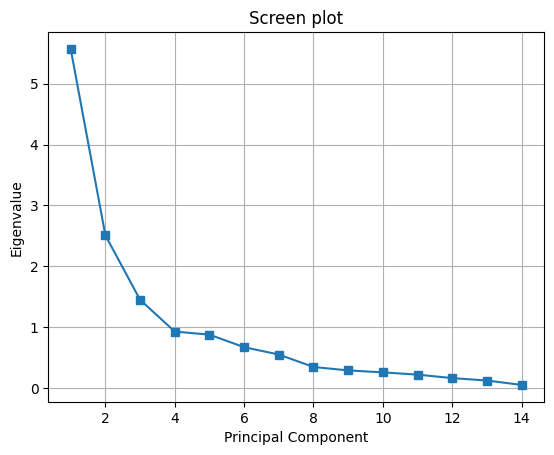

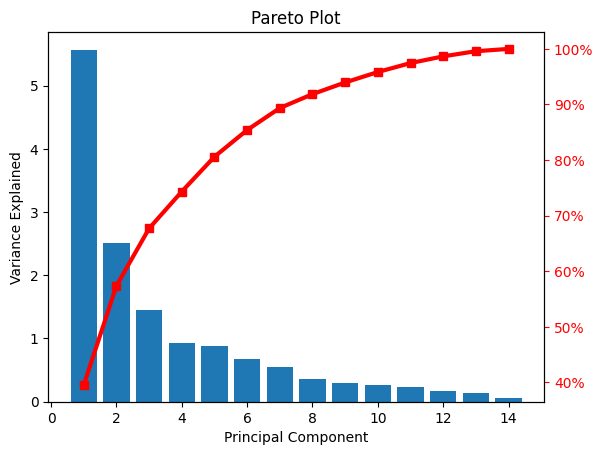

In [19]:

Sx = np.cov(ratings_.T, bias=False)

w, v = eig(Sx)
d,f = np.linalg.eig(Sx)
print(w)
idx = np.argsort(-w)
print(idx)
eigvals = w[idx]
eigvecs = v[:, idx]
print(eigvals)
Sigma_x = eigvecs @ np.diag(eigvals)@eigvecs.T

plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker="s")
plt.xlabel('Principal Component')
plt.ylabel("Eigenvalue")
plt.title("Screen plot")
plt.grid()
plt.show()

fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, marker="s", color="red", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
ax.set_title("Pareto Plot")
plt.show()

#### **討論**
第一張圖為Scree plot，代表所有主成份分析由大而小的分布，Y軸為資料的共變異數矩陣特徵分解中的eigenvalues，也代表每一個主成份分析的變異量，
第二張圖為Pareto plot則加入了累積變異的比例，可以發現前兩個主成份分析就佔整個主成份變異量的六成，也就是說前兩個就可以解釋全部數據六成的差異，而前三個主成份分析可達到近七成。


4、5.
資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？最後，再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。


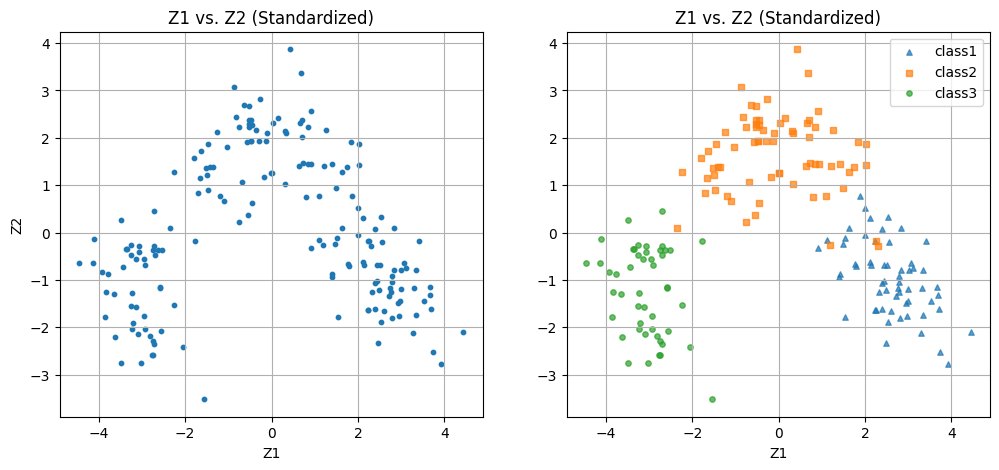

In [20]:



fig, ax = plt.subplots(1, 2, figsize=(12, 5))
Z1 = ratings_@eigvecs[:, 0]
Z2 = ratings_@eigvecs[:, 1]
ax[0].scatter(Z1, Z2, s=10)
ax[0].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
ax[0].grid()
ax[0].set_title("Z1 vs. Z2 (Standardized)")

Z = np.hstack((Z1.reshape(-1, 1), Z2.reshape(-1, 1),
              ratings[:, -1].reshape(-1, 1)))

idx = (Z[:, 2] == 1)
ax[1].scatter(Z[idx, 0], Z[idx, 1], s=15,
              marker='^', alpha=0.7, label="class1")
idx = (Z[:, 2] == 2)
ax[1].scatter(Z[idx, 0], Z[idx, 1], s=15,
              marker="s", alpha=0.7, label="class2")
idx = (Z[:, 2] == 3)
ax[1].scatter(Z[idx, 0], Z[idx, 1], s=15,
              marker="o", alpha=0.7, label="class3")
ax[1].grid()
ax[1].set_title("Z1 vs. Z2 (Standardized)")
ax[1].legend()
ax[1].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
plt.show()

#### **討論**
成份分析前，為了讓個個資料標準一致，會先將資料標準化。圖為取前兩項主成分作為xy軸（Z1、Z2），並繪製散佈圖，左圖為先不看這178支紅酒的酒莊標籤，直接畫出，能從肉眼分辨出大致分為三個群體，分邊為左下、中上、右下，代表其三間酒莊製作的酒成分是有差異的，且能從這兩個主成份分辨三個群體，右圖為標上三間酒莊標籤後的散佈圖。接下來我們想知道分析前未做標準差，會不會影響結果。

#### ***未做標準化的散佈圖***

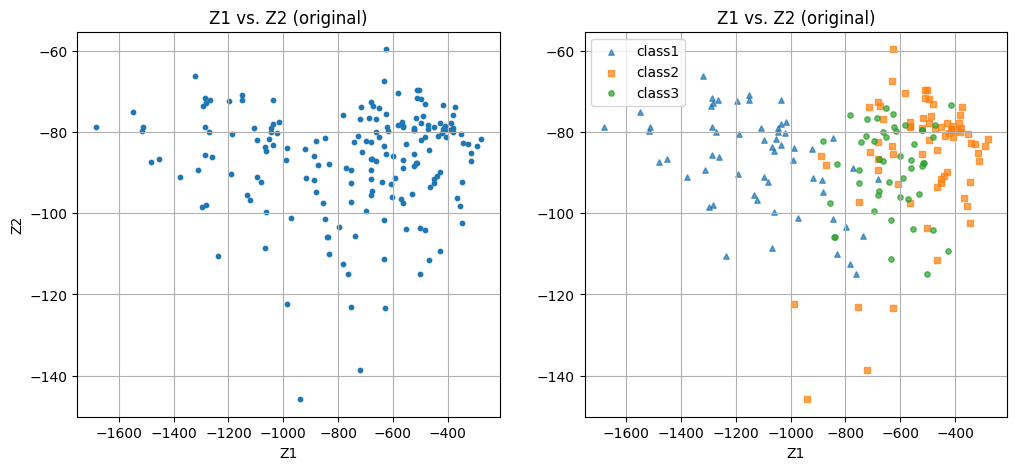

In [21]:
Sx = np.cov(ratings.T, bias=False)

w, v = eig(Sx)
d,f = np.linalg.eig(Sx)
idx = np.argsort(-w)
# print(idx)
eigvals_not_std = w[idx]
eigvecs_not_std = v[:, idx]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
X1 = ratings@eigvecs_not_std[:, 0]
X2 = ratings@eigvecs_not_std[:, 1]
ax[0].scatter(X1, X2, s=10)
ax[0].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
ax[0].grid()
ax[0].set_title("Z1 vs. Z2 (original)")

X = np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1),
              ratings[:, -1].reshape(-1, 1)))

idx = (X[:, 2] == 1)
ax[1].scatter(X[idx, 0], X[idx, 1], s=15,
              marker='^', alpha=0.7, label="class1")
idx = (X[:, 2] == 2)
ax[1].scatter(X[idx, 0], X[idx, 1], s=15,
              marker="s", alpha=0.7, label="class2")
idx = (X[:, 2] == 3)
ax[1].scatter(X[idx, 0], X[idx, 1], s=15,
              marker="o", alpha=0.7, label="class3")
ax[1].grid()
ax[1].set_title("Z1 vs. Z2 (original)")
ax[1].legend()
ax[1].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
plt.show()

####  **討論**
圖中不太能分辨三個群體，只能大致分辨出左邊稀疏部分和右邊密集部分可能分別為兩個群體，右圖為標上標籤後的圖，事實上，未經過標準化的資料可能具有不同的標準，這會導致每個特徵的變異數大小差異很大。在這種情況下，主成分分析更容易受到變異數較大的特徵的影響，所以，未經過標準化的資料進行主成分分析時，散佈圖可能會不準確地顯示資料點的分佈情況，無法真實地反映資料的結構和關係。

6.如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。


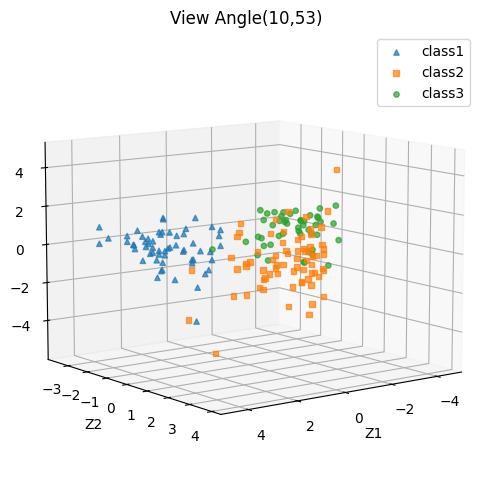

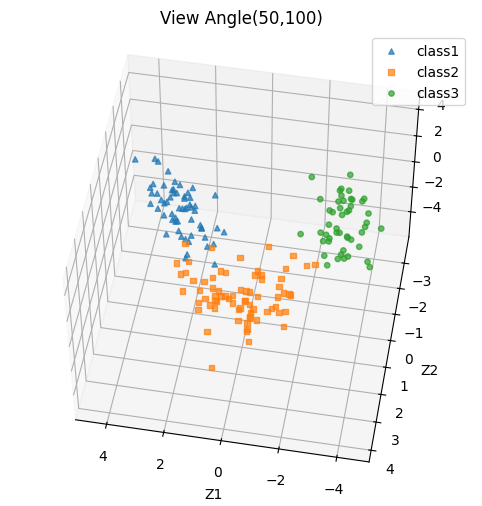

In [22]:
import numpy as np
import matplotlib.pyplot as plt
Z3 = ratings_@eigvecs[:, 2]
Z_3d = np.hstack((Z1.reshape(-1, 1), Z2.reshape(-1, 1),Z3.reshape(-1,1),ratings[:, -1].reshape(-1, 1)))


fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
idx = (Z_3d[:, 3] == 1)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker='^', alpha=0.7, label="class1")
idx = (Z_3d[:, 3] == 2)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker="s", alpha=0.7, label="class2")
idx = (Z_3d[:, 3] == 3)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1], Z_3d[idx,2],s=15,
              marker="o", alpha=0.7, label="class3")
ax.set_xlabel('Z1'), ax.set_ylabel('Z2')
ax.view_init(elev=10, azim=53)
ax.set_title("View Angle(10,53)")
ax.legend()
plt.show()
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
idx = (Z_3d[:, 3] == 1)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker='^', alpha=0.7, label="class1")
idx = (Z_3d[:, 3] == 2)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker="s", alpha=0.7, label="class2")
idx = (Z_3d[:, 3] == 3)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1], Z_3d[idx,2],s=15,
              marker="o", alpha=0.7, label="class3")
ax.set_xlabel('Z1'), ax.set_ylabel('Z2')

ax.view_init(elev=50, azim=100)
ax.legend()
ax.set_title("View Angle(50,100)")
plt.show()


#### **討論**
現在將第三個主成份納入考量，繪製出三維的散佈圖，圖中為兩個不同視角所繪製出的散佈圖，第一張圖為接近平視觀察，第二張圖為俯瞰觀察，要將第三個主成份納入考量，可以看習題三的Pareto plot中的變異解釋率（y軸左邊刻度）其前三個主成分佔總體解釋變異率近七成，但是否考量前兩個主成份就可以了，可以從圖中發現其分佈形狀和二維散佈圖類似，並沒有看出Z3軸對於資料有高低起伏的影響，所以和二維散佈圖類似，代表其分群能力是差不多的，故認為用二維散佈圖即可。

7.Z1 與 Z2 都是從原變數組合而成的新變數，可否從 Z1 與 Z2 的組成係數看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

第一主成份:
 [ 0.13632501 -0.22267638  0.00225793 -0.22429849  0.12463016  0.35926404
  0.39071171 -0.2670012   0.2790625  -0.08931829  0.27682265  0.35052618
  0.26951525 -0.39366953]
第二主成份:
 [-0.48416087 -0.22359095 -0.31585588  0.01161574 -0.30055143 -0.06711983
  0.00131345 -0.0269887  -0.04122256 -0.52978274  0.27790735  0.16277625
 -0.36605886 -0.00569041]


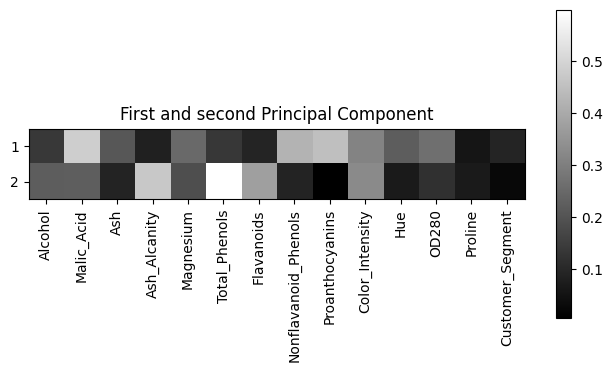

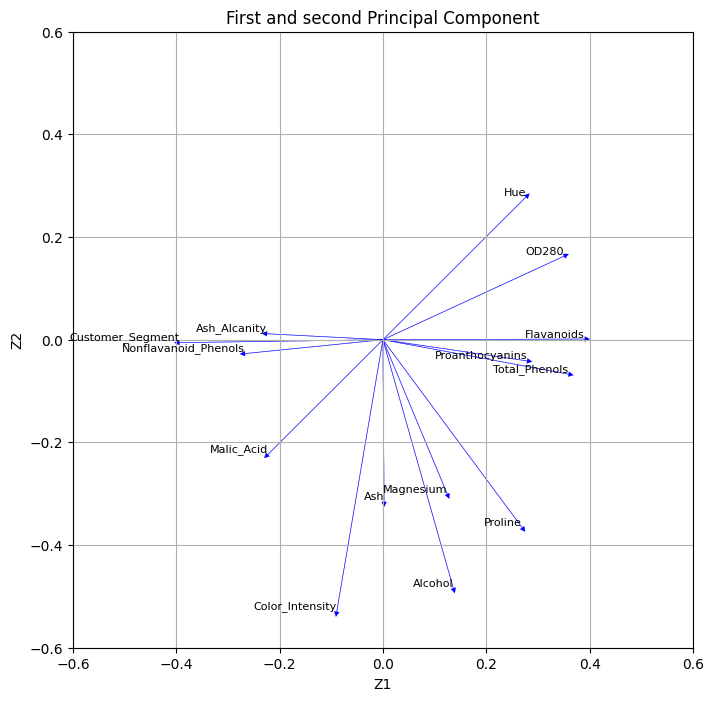

In [23]:


print('第一主成份:\n',eigvecs[:, 0])

print("第二主成份:\n",eigvecs[:, 1])

x = range(14)
plt.figure(figsize=(8, 4))
plt.imshow(np.abs(eigvecs[0:2,:]), cmap='grey')  
plt.colorbar()  
plt.yticks([0, 1], [1, 2])
plt.xticks(x,categories,rotation='vertical')
plt.title('First and second Principal Component')
plt.show()

start_point = (0, 0)

plt.figure(figsize=(8, 8)) 

for i in range(0, 14, 1):
    plt.arrow(*start_point, *eigvecs[i, 0:2], head_width=0.01, head_length=0.01, color='b', linewidth=0.1)
    plt.text(eigvecs[i, 0], eigvecs[i, 1], categories[i], fontsize=8, ha='right', va='bottom')
plt.xlim(-0.6, 0.6) 
plt.ylim(-0.6, 0.6) 
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.title('First and second Principal Component') 
plt.grid()
plt.show()










#### **討論**
先列印出第一第二主成份的eigenvectors，當我們降維時，可以發現是每個變數乘上其eigenvectors在全部加總生成Z，其意義上就是對每個變數乘上權重，當某些權重相對很小或接近0時，代表對於Z的貢獻是很小的，可以考慮忽略不計，
我們先列印出第一第二主成份的eigenvectors加以觀察，因為eigenvectors有正有負，所以我們加入絕對值，再畫出其熱圖顏色越黑越接近0，而越白值越大，考量到有第一第二主成份，我可以再二維平面畫出其向量圖，再考慮其對應的類別中刪減重疊向量或相對很短的向量。
從熱圖中可以觀察到沒有同時第一主成份和第二主成份都接近黑色的，向量圖中很少重疊或極短的向量，故認為其變數都是重要的。
從關係係數圖中對照向量圖來看，lavonoids和Total_phenols跟 OD280正相關程度很高，分別為0.86和0.79，但其向量圖並沒有很接近，反而是相關係數為0.6的Proanthocyanins、Total_Phenols非常接近。


習題二：
回答類似習題 1 的問題（如下所述），資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數共 30 個，樣本數為 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。

1.繪製一張含每個量測變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。


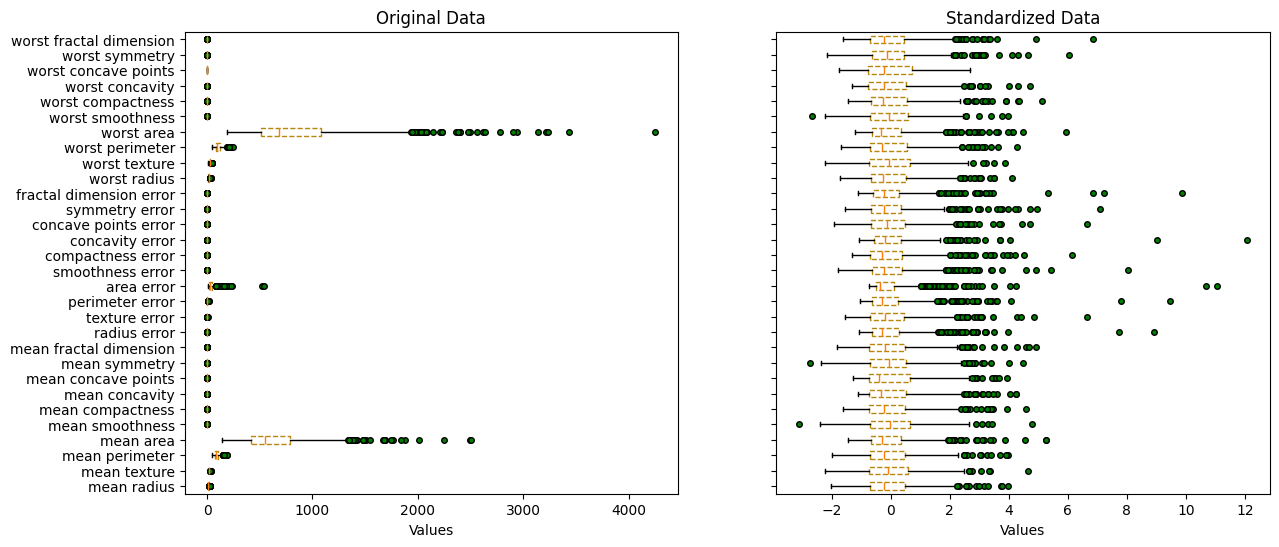

In [24]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer().data
target = load_breast_cancer().target
features_names = load_breast_cancer().feature_names
ratings1 = np.array(data)

# print(ratings[:,0])

scaler = StandardScaler()
scaler.fit(ratings1)
ratings_1 = scaler.transform(ratings1)
categories1 = features_names 


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green',
                  markersize=4, linestyle='none')
ax[0].boxplot(ratings1, boxprops=boxprops, flierprops=flierprops,
              labels=categories1, vert=False)
ax[0].set_xlabel('Values')
ax[0].set_title('Original Data')
ax[1].boxplot(ratings_1, boxprops=boxprops, flierprops=flierprops, vert=False)
ax[1].set_xlabel('Values')
ax[1].tick_params(labelleft=False)
ax[1].set_title('Standardized Data')
plt.show()

#### **討論**
左圖為未經過標準化的化學成分盒鬚圖，除了worst area、mean area能看到完整散佈和級距情況，其餘成分全部都濃縮成一團，這是因為每個變數皆不相同，只要其中一變數單位值是遠大於其他單位，其於變數畫出來的盒鬚圖就會遭到壓縮，單位不同則無從比較，右圖為標準化後的情況。接下來試著畫出Malignant（惡性腫瘤）與 Benign（良性腫瘤）情況下的盒鬚圖。

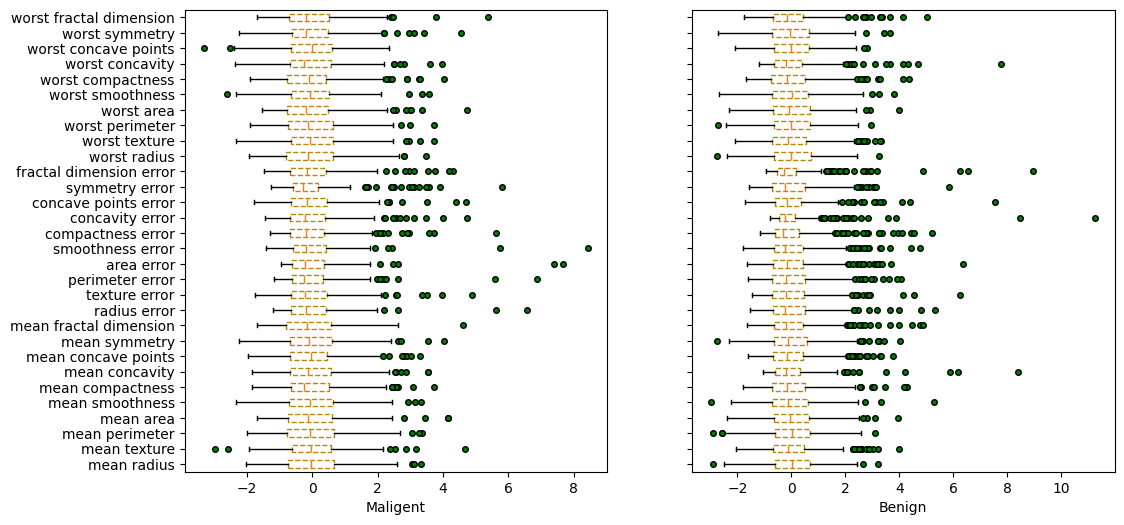

In [25]:
data_group = np.hstack((ratings_1,target.reshape(-1,1)))
# print(data_group.shape)
malignant = data_group[data_group[:,-1]==0]
malignant=malignant[:,0:30]
benign =data_group[data_group[:,-1]==1]
benign = benign[:,0:30]


malignant = np.array(malignant)
benign = np.array(benign)
# print(ratings[:,0])

scaler_malignant = StandardScaler()
scaler_benign = StandardScaler()

scaler_malignant.fit(malignant)
scaler_benign.fit(benign)

malignant = scaler_malignant.transform(malignant)
benign = scaler_benign.transform(benign)

categories1 = features_names 
# print(benign.shape)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
boxprops = dict(linestyle='--', linewidth=1, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green',
                  markersize=4, linestyle='none')
ax[0].boxplot(malignant, boxprops=boxprops, flierprops=flierprops,
              labels=categories1, vert=False)
ax[0].set_xlabel('Maligent')
ax[1].boxplot(benign, boxprops=boxprops, flierprops=flierprops, vert=False)
ax[1].set_xlabel('Benign')
ax[1].tick_params(labelleft=False)
plt.show()

#### **討論**
在此繪製出比較在Malignant（惡性腫瘤）與 Benign（良性腫瘤）情況下的盒鬚圖，左圖為Malignant，右圖為Bengin，可以觀察出Benign在各個變數下，離群值比Malignant來的多。

2.繪製變數間的相關係數圖，以觀察變數間是否存在相關性


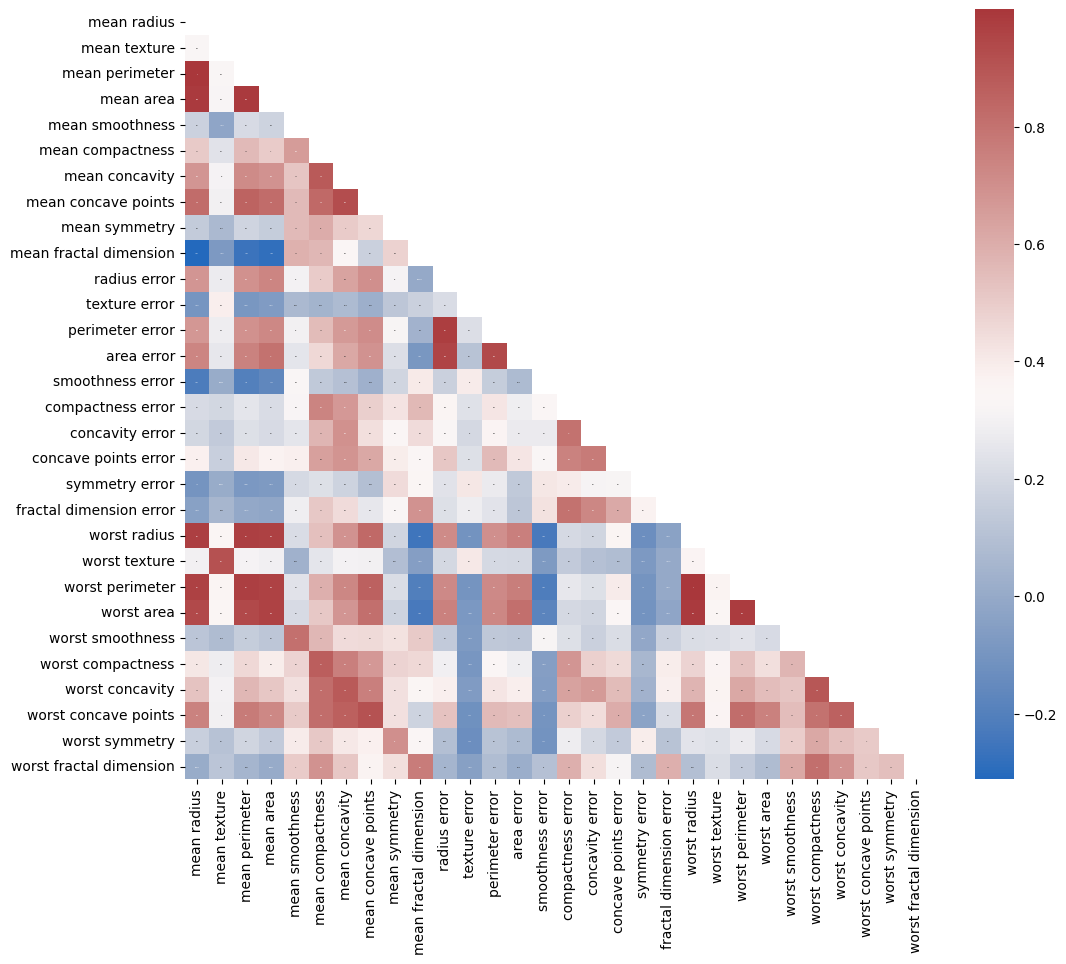

In [26]:
cancer_data = pd.DataFrame(ratings_1, columns=categories1)

R = cancer_data.corr()
#(cancer_data.T@cancer_data)/568
print()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
fig, ax = plt.subplots(figsize=(12, 10))
seaborn.heatmap((cancer_data.T@cancer_data)/568, annot=True, mask=mask, cmap='vlag', annot_kws={"size": 1})
plt.show()

#### **討論**
為了暸解各個成分間的相關性大小，畫出熱力圖，相關係數矩陣為對稱矩陣，因此僅呈現下半部，其越紅代表相關程度越為正相關，越藍相關程度越為負相關，越接近白色其程度越接近無關係，因為變數太多，所以把數值關掉。

在此繪製出比較在Malignant（惡性腫瘤）與 Benign（良性腫瘤）情況下的熱力圖，第一張圖為Malignant，第二張圖為Bengin，可以觀察出在不同情況下的變數熱力圖差別不是很大。

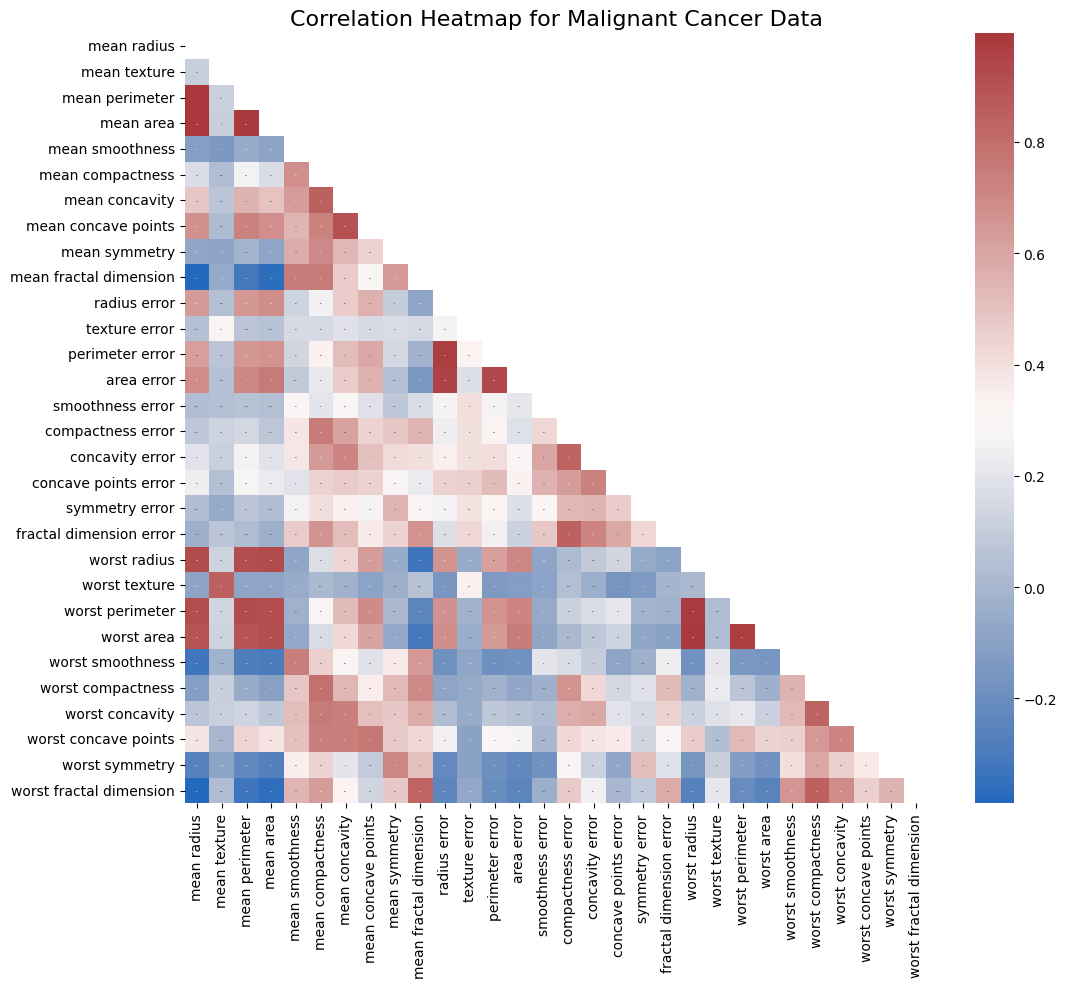

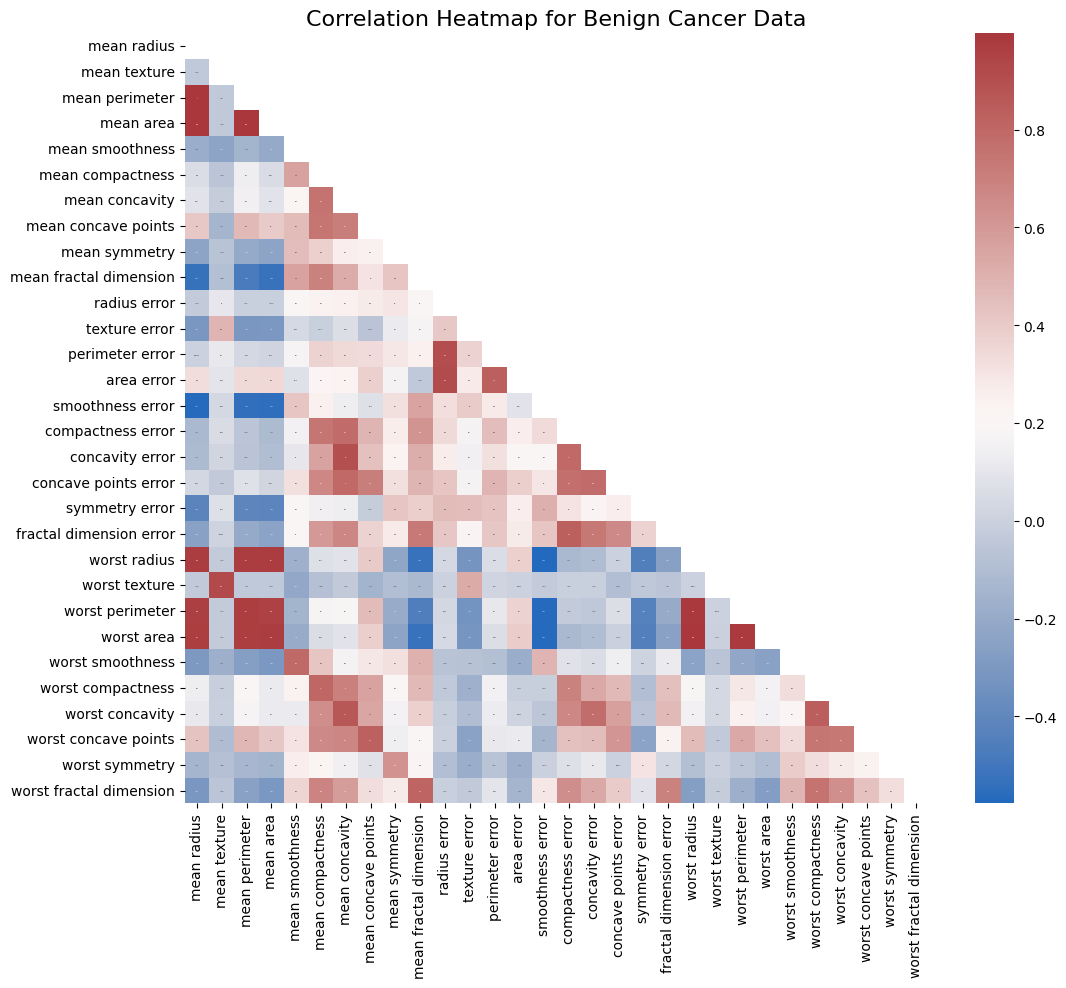

In [27]:
cancer_maligent_data = pd.DataFrame(malignant, columns=categories1)
R = cancer_maligent_data.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
fig, ax = plt.subplots(figsize=(12, 10))
seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', annot_kws={"size": 1})
ax.set_title('Correlation Heatmap for Malignant Cancer Data', fontsize=16)
plt.show()
cancer_benign_data = pd.DataFrame(benign, columns=categories1)
R = cancer_benign_data.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
fig, ax = plt.subplots(figsize=(12, 10))
seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', annot_kws={"size": 1})
ax.set_title('Correlation Heatmap for Benign Cancer Data', fontsize=16)
plt.show()

3.進行主成分分析，繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot

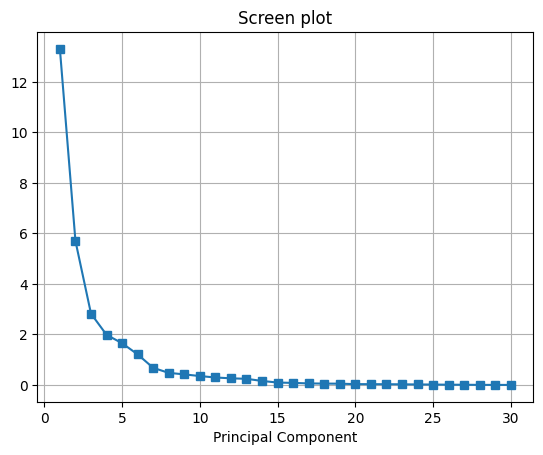

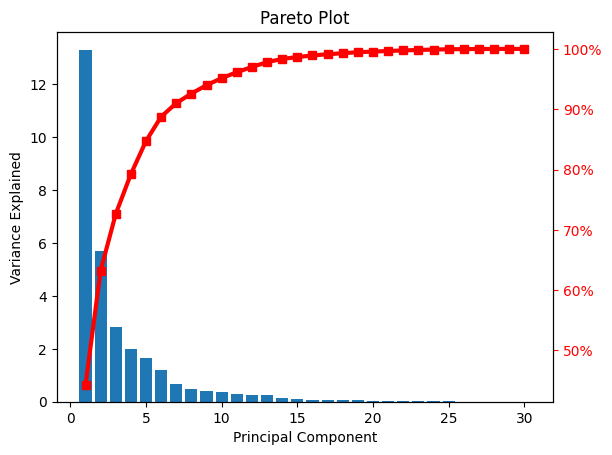

In [28]:
Sx = np.cov(ratings_1.T, bias=False)

w, v = eig(Sx)
# print(w)
idx = np.argsort(-w)
# print(idx)
eigvals1 = w[idx]
eigvecs1 = v[:, idx]
# print(eigvecs)
Sigma_x = eigvecs1 @ np.diag(eigvals1)@eigvecs1.T

plt.figure()
x = np.arange(1, 1+len(eigvals1))
plt.plot(x, eigvals1, marker="s")
plt.xlabel('Principal Component')
plt.title("Screen plot")
plt.grid()
plt.show()


fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals1))
ax.bar(x, eigvals1)
ax2 = ax.twinx()
ax2.plot(x, eigvals1.cumsum()/eigvals1.sum()*100, marker="s", color="red", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
ax.set_title("Pareto Plot")
plt.show()

#### **討論**
第一張圖為Scree plot，代表所有主成份分析由大而小的分佈，可以發現第一個主成份分析的變異量就是第二個主成份的兩倍，
第二張圖為Pareto plot則加入了累積變異的比例，可以發現前兩個主成份分析就佔整個主成份變異量的六成多，也就是說前兩個就可以解釋全部數據六成多的差異，而前三個主成份分析在七成初。

4、5.
每筆資料都有標籤值（label），代表腫瘤的成分（Malignant（惡性腫瘤）或 Benign（良性腫瘤））。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察「做與不做」標準化的差別。再依據每筆資料的標籤，在散佈圖上塗上不同顏色


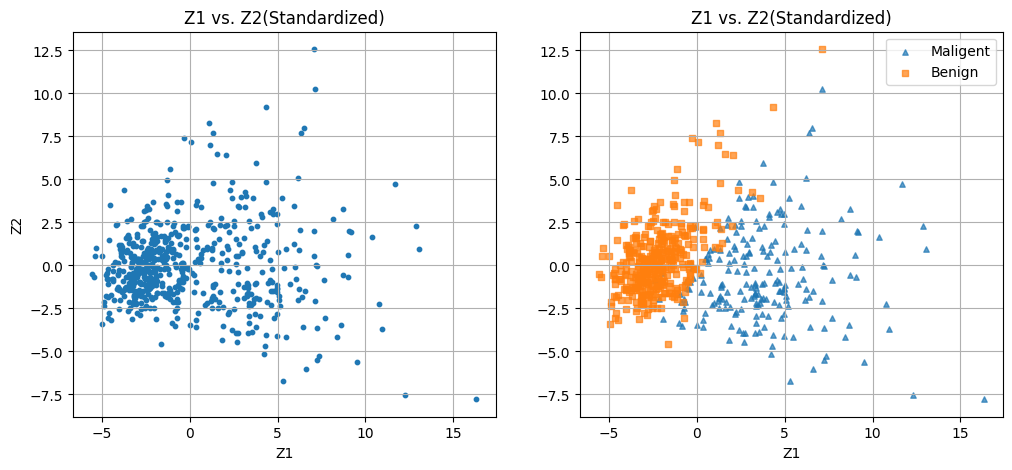

In [29]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
Z1 = ratings_1@eigvecs1[:, 0]
Z2 = ratings_1@eigvecs1[:, 1]
ax[0].scatter(Z1, Z2, s=10)
ax[0].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
ax[0].grid()
ax[0].set_title("Z1 vs. Z2(Standardized)")
# print(target.reshape(-1, 1))
Z = np.hstack((Z1.reshape(-1, 1), Z2.reshape(-1, 1),
              target.reshape(-1, 1)))

idx = (Z[:, 2] == 0)
ax[1].scatter(Z[idx, 0], Z[idx, 1], s=15,
              marker='^', alpha=0.7, label="Maligent")
idx = (Z[:, 2] == 1)
ax[1].scatter(Z[idx, 0], Z[idx, 1], s=15,
              marker="s", alpha=0.7, label="Benign")
ax[1].grid()
ax[1].set_title("Z1 vs. Z2(Standardized)")
ax[1].legend()
ax[1].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
plt.show()

## **討論**
主成份分析後，取前兩項成分作為xy軸，並繪製散佈圖，左圖為先不看腫瘤成份，直接畫出，其實不太好直觀分辨出，但還是可以經過觀察說較密集部分和較分散部分為兩個群體，且分散部分偏右，密集部分偏左，右圖為依據每筆資料的腫瘤成份的散佈圖，藍點為Maligent是較分散藍點，Benign為較密集的橘點，其前兩項主成份有好的群體辨識能力。接下來我們想知道分析前未做標準差，會不會影響結果。

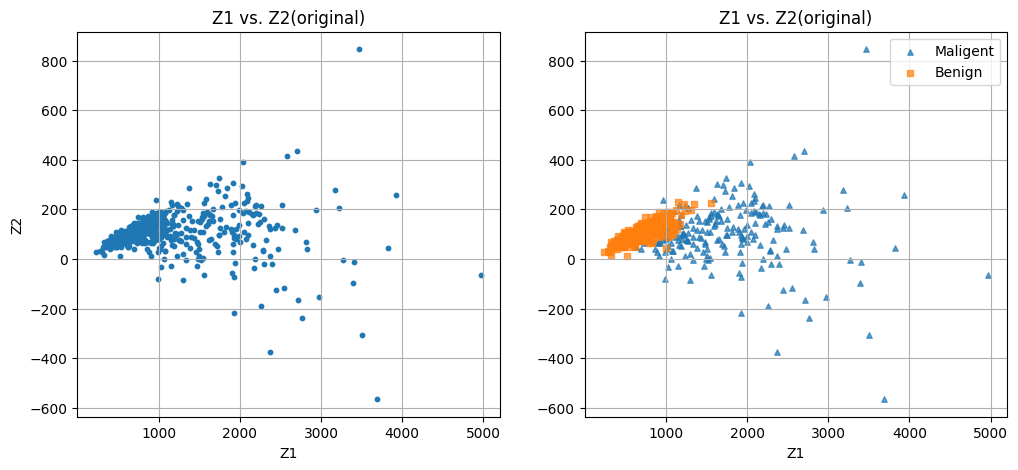

In [30]:
Sx = np.cov(ratings1.T, bias=False)

w, v = eig(Sx)
# print(w)
idx = np.argsort(-w)

eigvals1_not_std = w[idx]
eigvecs1_not_std = v[:, idx]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
Z1_not_std = ratings1@eigvecs1_not_std[:, 0]
Z2_not_std = ratings1@eigvecs1_not_std[:, 1]
ax[0].scatter(Z1_not_std, Z2_not_std, s=10)
ax[0].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
ax[0].grid()
ax[0].set_title("Z1 vs. Z2(original)")
# print(target.reshape(-1, 1))
Z_not_std = np.hstack((Z1_not_std.reshape(-1, 1), Z2_not_std.reshape(-1, 1),
              target.reshape(-1, 1)))

idx = (Z_not_std[:, 2] == 0)
ax[1].scatter(Z_not_std[idx, 0], Z_not_std[idx, 1], s=15,
              marker='^', alpha=0.7, label="Maligent")
idx = (Z_not_std[:, 2] == 1)
ax[1].scatter(Z_not_std[idx, 0], Z_not_std[idx, 1], s=15,
              marker="s", alpha=0.7, label="Benign")
ax[1].grid()
ax[1].set_title("Z1 vs. Z2(original)")
ax[1].legend()
ax[1].set_xlabel("Z1"), ax[0].set_ylabel("Z2")
plt.show()


####  **討論**
未經過標準化的散佈圖不太能分辨兩個群體，有邊密集部分已經成一團了，只能大致分辨出左邊稀疏部分和右邊密集部分可能分別為兩個群體，但實際上已哪裡為分界線比起標準化後，更難分辨，右圖為標上標籤後的圖。

6.如果採三個主成分，則可繪製立體圖。請嘗試旋轉立體圖的角度以取得最好的辨別視野。


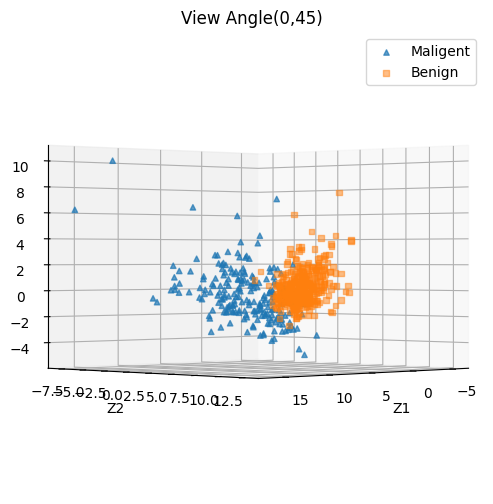

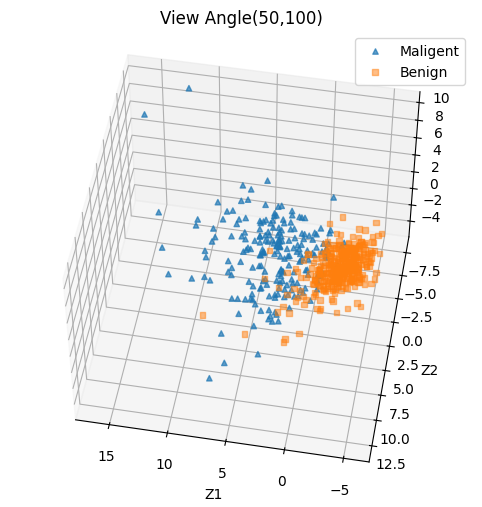

In [31]:
Z3 = ratings_1@eigvecs1[:, 2]
Z_3d = np.hstack((Z1.reshape(-1, 1), Z2.reshape(-1, 1),Z3.reshape(-1, 1),target.reshape(-1, 1)))


fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
idx = (Z_3d[:, 3] == 0)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker='^', alpha=0.7, label="Maligent")
idx = (Z_3d[:, 3] == 1)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker="s", alpha=0.5, label="Benign")

ax.set_xlabel('Z1'), ax.set_ylabel('Z2')
ax.view_init(elev=0, azim=45)
ax.legend()
ax.set_title('View Angle(0,45)')
plt.show()
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
idx = (Z_3d[:, 3] == 0)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker='^', alpha=0.7, label="Maligent")
idx = (Z_3d[:, 3] == 1)
ax.scatter(Z_3d[idx, 0], Z_3d[idx, 1],Z_3d[idx, 2], s=15,
              marker="s", alpha=0.5, label="Benign")

ax.set_xlabel('Z1'), ax.set_ylabel('Z2')

ax.view_init(elev=50, azim=100)
ax.set_title('View Angle(50,100)')
ax.legend()
plt.show()

## **討論**
現在將第三個主成份納入考量，繪製出三維的散佈圖，下圖為兩個不同視角所繪製出的散佈圖，第一張圖為接近平視觀察，第二張圖為俯瞰觀察，要將第三個主成份納入考量，可以看習題三的Pareto plot中的變異解釋率（y軸左邊刻度），其前三個主成分佔總體解釋變異率七成初，Z3軸對於資料是有高低起伏的影響，代表其分群能力在三維下比起二維能解釋得更多。

7.Z1 與 Z2 都是從原變數組合而成的新變數，可否從 Z1 與 Z2 的組成係數看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

第一主成份：
 [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
第二主成份:
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


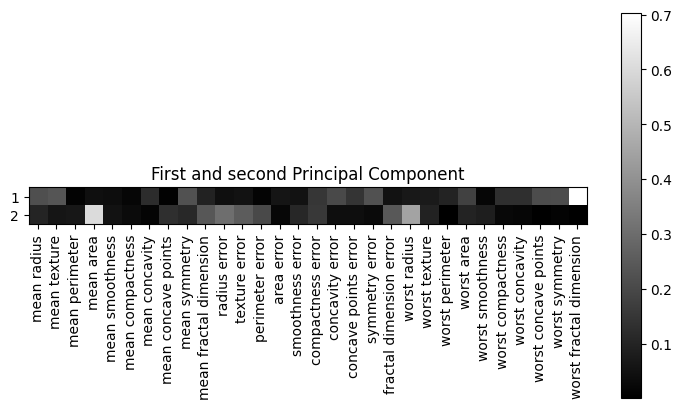

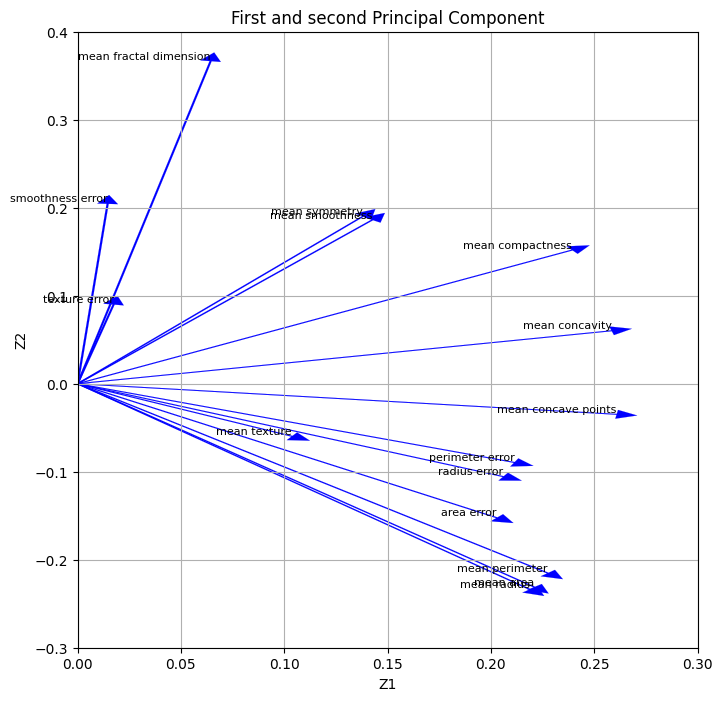

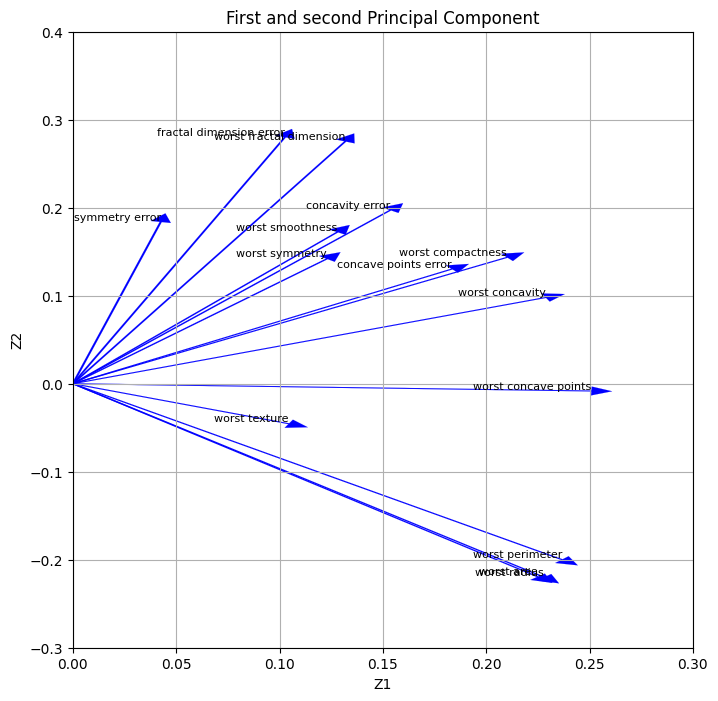

In [32]:


print("第一主成份：\n",eigvecs1[:, 0])

print("第二主成份:\n",eigvecs1[:, 1])

x = range(30)
plt.figure(figsize=(9, 5))
plt.imshow(np.abs(eigvecs1[0:2,:]), cmap="grey")  
plt.colorbar()  
plt.yticks([0, 1], [1, 2])
plt.xticks(x,categories1,rotation='vertical')
plt.title('First and second Principal Component')
plt.show()

start_point = (0, 0)

plt.figure(figsize=(8, 8)) 

for i in range(0, 15, 1):
    plt.arrow(*start_point, *eigvecs1[i, 0:2], head_width=0.01, head_length=0.01, color='b', linewidth=0.1)
    plt.text(eigvecs1[i, 0], eigvecs1[i, 1], categories1[i], fontsize=8, ha='right', va='bottom')
plt.xlim(0, 0.3) 
plt.ylim(-0.3, 0.4) 
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.title('First and second Principal Component') 
plt.grid()
plt.show()
plt.figure(figsize=(8, 8)) 
plt.grid()
for i in range(16, 30, 1):
    plt.arrow(*start_point, *eigvecs1[i, 0:2], head_width=0.01, head_length=0.01, color='b', linewidth=0.1)
    plt.text(eigvecs1[i, 0], eigvecs1[i, 1], categories1[i], fontsize=8, ha='right', va='bottom')
plt.xlim(0, 0.3) 
plt.ylim(-0.3, 0.4) 
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.title('First and second Principal Component') 

plt.show()


#### **討論**
我們先列印出第一第二主成份的eigenvectors加以觀察，一樣先全部都絕對值，再畫出其熱圖顏色越黑代表數值接近0，而越黑數值越大，接著再畫出其向量圖，因變數眾多我們分兩張圖來畫，向量圖中相對較短的例如texture error，代表其解釋能力較低，較不重要，再來是texture error、worst texture，但考量到此三個為同一系列變數(texture)可考慮只留下一個為代表，另外兩張向量圖中有許多幾乎重疊的向量，例如perimeter error和radius error、mean symmetry和mean smoothness、mean radius和mean perimeter和mean area...等，會發現其對應的相關係數圖都有著高度正相關，這裡可以選擇其中一個為代表，或試著考量第三個主成分。


